In [1]:
import pickle
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense, Conv2D, Flatten, MaxPooling2D, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
from tensorflow.keras import layers

In [2]:
tf.__version__

'2.7.0'

In [3]:
pickle_in = open("X_train_da.pickle", "rb")
X = pickle.load(pickle_in)
X = X

pickle_in = open("Y_train_da.pickle", "rb")
y = pickle.load(pickle_in)

In [4]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [5]:
INPUT_SHAPE = X[0].shape

In [6]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = INPUT_SHAPE, activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256))

model.add(Dense(21, activation = "softmax"))

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8

In [8]:
history = model.fit(X, y, batch_size=64, epochs=10, validation_split = 0.2)
model.save("data_augmentation.model")

Epoch 1/10
1562/1562 [==============================] - 132s 41ms/step - loss: 7.5261 - accuracy: 0.1810 - val_loss: 3.0400 - val_accuracy: 0.0478
Epoch 2/10
1562/1562 [==============================] - 63s 40ms/step - loss: 2.9671 - accuracy: 0.0857 - val_loss: 2.6968 - val_accuracy: 0.1639
Epoch 3/10
1562/1562 [==============================] - 62s 40ms/step - loss: 2.7976 - accuracy: 0.1577 - val_loss: 3.0371 - val_accuracy: 0.0495
Epoch 4/10
1562/1562 [==============================] - 66s 42ms/step - loss: 3.0313 - accuracy: 0.0537 - val_loss: 3.0378 - val_accuracy: 0.0527
Epoch 5/10
1562/1562 [==============================] - 62s 40ms/step - loss: 3.0345 - accuracy: 0.0515 - val_loss: 3.0370 - val_accuracy: 0.0517
Epoch 6/10
1562/1562 [==============================] - 66s 42ms/step - loss: 3.0353 - accuracy: 0.0502 - val_loss: 3.0373 - val_accuracy: 0.0493
Epoch 7/10
1562/1562 [==============================] - 67s 43ms/step - loss: 3.0352 - accuracy: 0.0510 - val_loss: 3.0369 

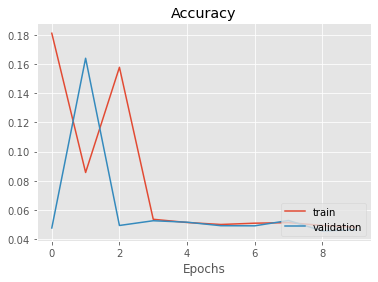

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(history.history['accuracy'], label="train")
plt.plot(history.history['val_accuracy'], label="validation")
plt.xlabel("Epochs")
plt.legend(loc="lower right")
plt.title("Accuracy")
plt.show()

In [10]:
pickle_in = open("X_test_da.pickle", "rb")
X = pickle.load(pickle_in)
X = X

pickle_in = open("Y_test_da.pickle", "rb")
y = pickle.load(pickle_in)

In [11]:
data_augmentation = tf.keras.models.load_model("data_augmentation.model")

In [13]:
data_augmentation.evaluate(X, y)

434/434 [==============================] - 8s 10ms/step - loss: 3.0454 - accuracy: 0.0517


[3.0453529357910156, 0.05173283442854881]

In [ ]:
# callback tensorboard
# train, test, validation
# data augmentation

# Próximos passos: mobilenet + model